In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

2024-02-24 14:15:23.943449: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-24 14:15:23.943575: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-24 14:15:24.073692: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# To ignore warinings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset
df = pd.read_csv('/kaggle/input/nepali-news-classification-set/full_cleaned.csv')

In [4]:
df.head()

,title,news_stopwords,news_no_stopwords,category
0,निखिल उप्रेतीको भैरव फिल्मले अमेरिकामा रहेका न...,अमेरिकाका नेपालीको प्रतिक्रिया लिने इच्छा व्यक...,अमेरिकाका नेपालीको प्रतिक्रिया लिने इच्छा व्यक...,मनोरञ्जन
1,सुशील कोइरालाको निधनपछि चौरासी बाले खोले यस्ता...,झण्डै बर्षअघि सुशील कोइरालाले प्रधानमन्त्रीको ...,झण्डै बर्षअघि सुशील कोइरालाले प्रधानमन्त्रीको ...,मनोरञ्जन
2,लिटल प्रिन्स एण्ड प्रिन्सेसको ग्रान्ड फिनाले,ग्ल्यामरस नेपालले सुरुङ्गामा लिटल प्रिन्स एन्ड...,ग्ल्यामरस नेपालले सुरुङ्गामा लिटल प्रिन्स एन्ड...,मनोरञ्जन
3,अमेरिकामा सबैभन्दा धेरै कमाउने सिईओ बने पिचाई ...,गूगलका सिईओ सुन्दर पिचाई अमेरिकामा सबैभन्दा धे...,गूगलका सिईओ सुन्दर पिचाई अमेरिकामा सबैभन्दा कम...,मनोरञ्जन
4,ज्योती मगरको धमाका दोहोरीमा र्याप,दोहोरीमा र्याप बोलको गीतको भिडियो सार्वजनिक भए...,दोहोरीमा र्याप बोलको गीतको भिडियो सार्वजनिक चर...,मनोरञ्जन


In [5]:
df.head(5)

,title,news_stopwords,news_no_stopwords,category
0,निखिल उप्रेतीको भैरव फिल्मले अमेरिकामा रहेका न...,अमेरिकाका नेपालीको प्रतिक्रिया लिने इच्छा व्यक...,अमेरिकाका नेपालीको प्रतिक्रिया लिने इच्छा व्यक...,मनोरञ्जन
1,सुशील कोइरालाको निधनपछि चौरासी बाले खोले यस्ता...,झण्डै बर्षअघि सुशील कोइरालाले प्रधानमन्त्रीको ...,झण्डै बर्षअघि सुशील कोइरालाले प्रधानमन्त्रीको ...,मनोरञ्जन
2,लिटल प्रिन्स एण्ड प्रिन्सेसको ग्रान्ड फिनाले,ग्ल्यामरस नेपालले सुरुङ्गामा लिटल प्रिन्स एन्ड...,ग्ल्यामरस नेपालले सुरुङ्गामा लिटल प्रिन्स एन्ड...,मनोरञ्जन
3,अमेरिकामा सबैभन्दा धेरै कमाउने सिईओ बने पिचाई ...,गूगलका सिईओ सुन्दर पिचाई अमेरिकामा सबैभन्दा धे...,गूगलका सिईओ सुन्दर पिचाई अमेरिकामा सबैभन्दा कम...,मनोरञ्जन
4,ज्योती मगरको धमाका दोहोरीमा र्याप,दोहोरीमा र्याप बोलको गीतको भिडियो सार्वजनिक भए...,दोहोरीमा र्याप बोलको गीतको भिडियो सार्वजनिक चर...,मनोरञ्जन


In [6]:
df.shape

(369800, 4)

For classification, we only need the news(news_no_stopwords) and catgeory.<br>
So lets remove the other unnecessary columns

In [7]:
df.drop(columns=["title", "news_stopwords"], inplace=True)

In [8]:
df.shape

(369800, 2)

In [9]:
df.describe()

,news_no_stopwords,category
count,369800,369800
unique,361955,10
top,थप जनामा कोरोना भाइरस संक्रमण पुष्टि घन्टामा द...,राजनीति
freq,36,59975


So, we have 361955 unique news scattered along 10 different catgeories.<br>
There seems to be duplicate news. So lets remove them.

In [10]:
df.drop_duplicates(["news_no_stopwords"], inplace=True)

In [11]:
df.describe()

,news_no_stopwords,category
count,361955,361955
unique,361955,10
top,आइसिएफसी फाइनान्स लिमिटेडले रूपन्देहीको तिलोत्...,राजनीति
freq,1,57256


Now lets check if there are any null values.<br>
If there are any, we will remove them too

In [12]:
df.isnull().sum()

news_no_stopwords    0
category             0
dtype: int64

Lets check if data is distributed evenly between the catgeories  

<Axes: xlabel='category', ylabel='count'>

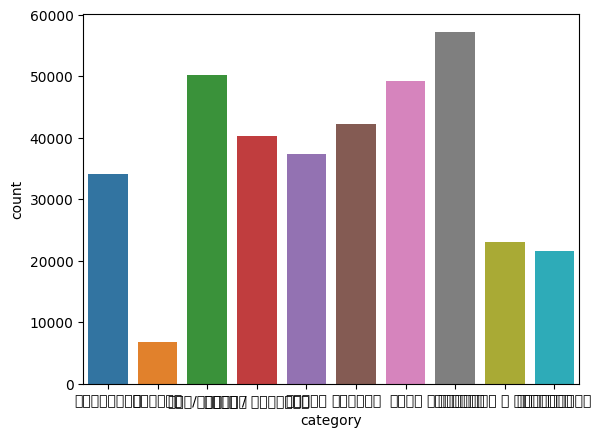

In [13]:
sns.countplot(data=df, x='category')

The plot is not understanding nepali language, so lets map the catgeories to numbers

In [14]:
df["category"].value_counts()

category
राजनीति              57256
देश/प्रदेश           50188
समाज                 49303
खेलकुद               42201
अर्थ / वाणिज्य       40238
विश्व                37305
मनोरञ्जन             34074
विज्ञान र प्रविधि    23076
स्वास्थ्य            21600
शिक्षा                6714
Name: count, dtype: int64

The number of samples for catgeory "शिक्षा" is extremely low, so lets just remove it from the dataset altogether

In [15]:
len(df["category"])

361955

In [16]:
df = df[df["category"] != "शिक्षा"]

In [17]:
361955 - len(df["category"])

6714

In [18]:
category_mapping = {
    "मनोरञ्जन": 0,
    "देश/प्रदेश": 1,
    "अर्थ / वाणिज्य": 2,
    "विश्व": 3,
    "खेलकुद": 4,
    "समाज": 5,
    "राजनीति": 6,
    "विज्ञान र प्रविधि": 7,
    "स्वास्थ्य": 8,
} 

In [19]:
CONSTANTS = {}
CONSTANTS["total_categories"] = 9

In [20]:
df["category"] = df["category"].map(category_mapping)

Now lets look at the distribution

<Axes: xlabel='category', ylabel='count'>

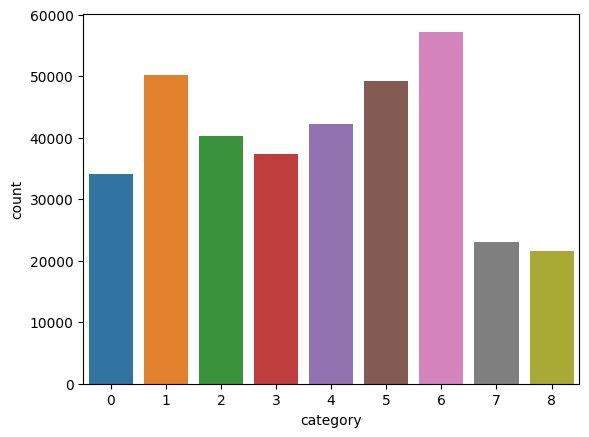

In [21]:
sns.countplot(data=df, x='category')

In [22]:
df["category"].value_counts()

category
6    57256
1    50188
5    49303
4    42201
2    40238
3    37305
0    34074
7    23076
8    21600
Name: count, dtype: int64

Our data is highly imbalanced, so lets perform random undersampling so that maximum number of instances for each catgeory is atmost 25K

In [23]:
def random_undersampling(data, random_state):
    if len(data) > 25000:
        return data.sample(25000, random_state=random_state)
    return data

In [24]:
df_balanced = pd.DataFrame(columns=['news_no_stopwords', 'category'])
for i in range(CONSTANTS["total_categories"]):
    res = random_undersampling(df[df["category"] == i], i * np.random.randint(100))
    if df_balanced.empty == True:
        df_balanced = res
    else:
        df_balanced = pd.concat([df_balanced, res], ignore_index=True)

In [25]:
df_balanced["category"].value_counts()

category
0    25000
1    25000
2    25000
3    25000
4    25000
5    25000
6    25000
7    23076
8    21600
Name: count, dtype: int64

Now, our dataset has been balanced.<br>
Lets shuffle the dataset so that their order of news from same categories is not simulatenous

In [26]:
df_balanced.head()

,news_no_stopwords,category
0,सोसल मिडियामा ऐश्वर्या राय बच्चन अभिषेक बच्चनक...,0
1,फिल्म होस्टेल रिर्टन्स बाट अभिनयमा डेब्यु अभिन...,0
2,भारतको केरलकी ट्रान्सवुमन मेकअप आर्टिस्ट सीमा ...,0
3,वरिष्ठ अभिनेता निर शाहले अन्तर्राष्ट्रिय स्तरक...,0
4,दिनदेखि दार्जिलिङमा छायांकन भईरहेको चलचित्र चा...,0


In [27]:
for i in range(20):
    df_balanced = df_balanced.sample(frac=1)

In [28]:
df_balanced.head()

,news_no_stopwords,category
174789,लुम्बिनी प्रदेशको चालु अधिवेशन अन्त्य मंगलबार ...,6
153164,नेपालसमेत सदस्य बहुपक्षीय प्राविधिक आर्थिक सहय...,6
47835,लक्षित वर्गका बनेको कानुन स्थानीय स्तरमा कार्य...,1
59197,सङ्ख्याविज्ञानमा अङ्क एउटा चक्रको अन्त्य चक्रक...,2
14848,भारतीय अभिनेत्री अली खान अभिनेता कार्तिक आर्यन...,0


Now lets compute the length of each news article

In [29]:
df_balanced["length"] = df_balanced["news_no_stopwords"].apply(lambda x: len(x.split()))

Lets remove any news of length <30

In [30]:
df_balanced = df_balanced[df_balanced["length"] >= 30]

We will train our model to predict its catgeory using news with maximum length of 250 .<br>
So, any news of length >250, we will slice it to be of required length.<br>
Similarly, news of length <250 will be extended to to be of required length by padding 0s

In [31]:
CONSTANTS["max_news_length"]= 250

In [32]:
df_balanced["news_no_stopwords"] = df_balanced["news_no_stopwords"].apply(lambda x: " ".join(x.split()[:CONSTANTS["max_news_length"]]))

Now lets split our dataset into train(70%), validation set(12.5%) and test set(12.5%)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_val_test, y_train, y_val_test = train_test_split(df_balanced['news_no_stopwords'], df_balanced['category'], test_size=0.25, random_state=21, stratify=df_balanced["category"], shuffle=True)

In [35]:
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=28, stratify=y_val_test, shuffle=True)

In [36]:
X_train.shape, X_val.shape, X_test.shape 

((163946,), (27324,), (27325,))

Now we will create our tokenizer

In [37]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [38]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(list(X_train))

In [39]:
CONSTANTS["voc_size"] = len(tokenizer.word_index) + 1

Now we convert our words to integers

In [40]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_val_seq = tokenizer.texts_to_sequences(X_val)

Finally we will pad our sequences so that all the inputs are of same length, 200

In [41]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [42]:
X_train_pad_seq = pad_sequences(X_train_seq,  maxlen=CONSTANTS["max_news_length"], padding='post')
X_test_pad_seq = pad_sequences(X_test_seq,  maxlen=CONSTANTS["max_news_length"], padding='post')
X_val_pad_seq = pad_sequences(X_val_seq,  maxlen=CONSTANTS["max_news_length"], padding='post')

In [43]:
X_train_pad_seq.shape, X_val_pad_seq.shape, X_test_pad_seq.shape

((163946, 250), (27324, 250), (27325, 250))

In [44]:
CONSTANTS["total_categories"] = 9

If target variables are simply a list of targets. Eg: [[1], [2], [0]] then, we can use the sparse catgeorical crossentropy loss

Similarly, we can only one-hot-encode each target value in which case we would use categorical crossentropy loss

In [45]:
y_train = tf.keras.utils.to_categorical(y_train, CONSTANTS["total_categories"])
y_val = tf.keras.utils.to_categorical(y_val, CONSTANTS["total_categories"])
y_test = tf.keras.utils.to_categorical(y_test, CONSTANTS["total_categories"])

In [46]:
y_train.shape, y_val.shape, y_test.shape

((163946, 9), (27324, 9), (27325, 9))

Now lets create our LSTM model for news classification

In [47]:
CONSTANTS["embedding_dim"] = 50
CONSTANTS["latent_dim"] = 8

In [48]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(CONSTANTS["voc_size"], CONSTANTS["embedding_dim"], trainable=True, input_length=CONSTANTS["max_news_length"], name="Embedding_Layer"))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(CONSTANTS["latent_dim"], return_sequences=False, dropout=0.2, recurrent_dropout=0.2, name="BiLSTM_Layer")))
model.add(tf.keras.layers.Dense(CONSTANTS["total_categories"], activation='softmax', name="Softmax_Layer"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Embedding_Layer (Embedding  (None, 250, 50)           36887800  
 )                                                               
                                                                 
 bidirectional (Bidirection  (None, 16)                3776      
 al)                                                             
                                                                 
 Softmax_Layer (Dense)       (None, 9)                 153       
                                                                 
Total params: 36891729 (140.73 MB)
Trainable params: 36891729 (140.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


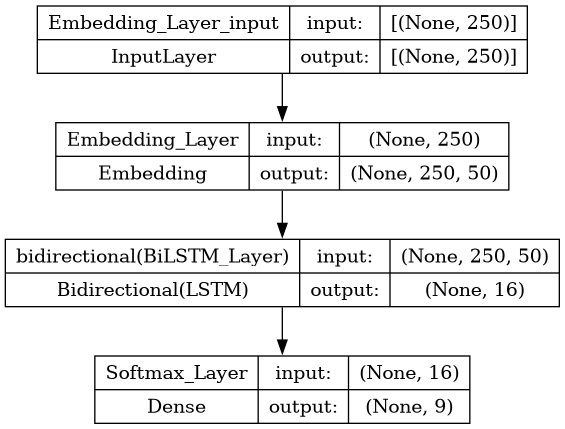

In [49]:
tf.keras.utils.plot_model(model, to_file='/kaggle/working/model_architecture.png', show_shapes=True)

In [50]:
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy', tf.keras.metrics.F1Score(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
              )

In [51]:
CONSTANTS["batch_size"] = 512
CONSTANTS["epochs"] = 16
CONSTANTS["patience"] = 3

We will train using early stopping

In [52]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=CONSTANTS["patience"])
cp = tf.keras.callbacks.ModelCheckpoint("/kaggle/working/NepaliNewsClassifier", monitor="val_loss", mode="min", save_best_only=True)

In [53]:
history = model.fit(X_train_pad_seq, y_train,
                    batch_size=CONSTANTS["batch_size"],
                    epochs=CONSTANTS["epochs"],
                    validation_data=(X_val_pad_seq, y_val),
                    callbacks=[es, cp])

Epoch 1/16


I0000 00:00:1708784312.258010      70 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


321/321 [==============================] - 466s 1s/step - loss: 1.4889 - accuracy: 0.5479 - f1_score: 0.5301 - precision: 0.8974 - recall: 0.1635 - val_loss: 0.9658 - val_accuracy: 0.7079 - val_f1_score: 0.6904 - val_precision: 0.8724 - val_recall: 0.4198
Epoch 2/16
321/321 [==============================] - 450s 1s/step - loss: 0.8372 - accuracy: 0.7410 - f1_score: 0.7350 - precision: 0.8761 - recall: 0.5254 - val_loss: 0.7957 - val_accuracy: 0.7467 - val_f1_score: 0.7411 - val_precision: 0.8494 - val_recall: 0.6207
Epoch 3/16
321/321 [==============================] - 445s 1s/step - loss: 0.6506 - accuracy: 0.7979 - f1_score: 0.7953 - precision: 0.8698 - recall: 0.7024 - val_loss: 0.7209 - val_accuracy: 0.7649 - val_f1_score: 0.7611 - val_precision: 0.8230 - val_recall: 0.7060
Epoch 4/16
321/321 [==============================] - 438s 1s/step - loss: 0.4984 - accuracy: 0.8473 - f1_score: 0.8458 - precision: 0.8854 - recall: 0.8015 - val_loss: 0.6904 - val_accuracy: 0.7723 - val_f1_sc

Now lets evalaute our model on the test set

In [54]:
model.evaluate(X_test_pad_seq, y_test)

854/854 [==============================] - 95s 111ms/step - loss: 0.7730 - accuracy: 0.7670 - f1_score: 0.7681 - precision: 0.7869 - recall: 0.7531


[0.7729761004447937,
 0.7669899463653564,
 array([0.9453252 , 0.50337994, 0.7305634 , 0.86688095, 0.9633541 ,
        0.5210967 , 0.75191474, 0.8378662 , 0.79251516], dtype=float32),
 0.786929726600647,
 0.7531198263168335]

Finally, lets save our tokenizer, CONSTANTS

In [55]:
import io, json

In [56]:
# Convert and write JSON object to file
with open("/kaggle/working/constants.json", "w") as const: 
    json.dump(CONSTANTS, const)

In [57]:
with io.open('/kaggle/working/tokenizer.json', 'w', encoding='utf-8') as tok:
    tok.write(json.dumps(tokenizer.to_json(), ensure_ascii=False))

In [58]:
!zip -r model_ouput.zip /kaggle/working

  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/tokenizer.json (deflated 89%)
  adding: kaggle/working/__notebook__.ipynb (deflated 92%)
  adding: kaggle/working/NepaliNewsClassifier/ (stored 0%)
  adding: kaggle/working/NepaliNewsClassifier/variables/ (stored 0%)
  adding: kaggle/working/NepaliNewsClassifier/variables/variables.data-00000-of-00001 (deflated 4%)
  adding: kaggle/working/NepaliNewsClassifier/variables/variables.index (deflated 64%)
  adding: kaggle/working/NepaliNewsClassifier/assets/ (stored 0%)
  adding: kaggle/working/NepaliNewsClassifier/fingerprint.pb (stored 0%)
  adding: kaggle/working/NepaliNewsClassifier/saved_model.pb (deflated 91%)
  adding: kaggle/working/NepaliNewsClassifier/keras_metadata.pb (deflated 89%)
  adding: kaggle/working/constants.json (deflated 23%)
  adding: kaggle/working/model_architecture.png (deflated 10%)
